In [1]:
import tensorflow as tf
import tensorflow_probability as tfp

tfd = tfp.distributions
tfpl = tfp.layers

In [2]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout
from tensorflow.keras.optimizers import Adam
import os
import numpy as np
import matplotlib.pyplot as plt
import splitfolders 

In [3]:
input_dir = os.path.join('D:/Learning/Data_Science_Mini_Project/Bayesian CNN/flowers/')
output_dir = os.path.join('D:/Learning/Data_Science_Mini_Project/Bayesian CNN/flowers_splitted/')

In [4]:
splitfolders.ratio(input_dir, output=output_dir, seed=1337, ratio=(.8, .2), group_prefix=None)

Copying files: 4326 files [00:28, 149.27 files/s]


In [5]:
train_dir = os.path.join('D:/Learning/Data_Science_Mini_Project/Bayesian CNN/flowers_splitted/train/')
test_dir = os.path.join('D:/Learning/Data_Science_Mini_Project/Bayesian CNN/flowers_splitted/val/')

In [6]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [7]:
def image_generator(train_parent_directory, test_parent_directory):
    
    train_datagen = ImageDataGenerator(rescale=1/255)
    test_datagen = ImageDataGenerator(rescale=1/255)
    
    train_generator = train_datagen.flow_from_directory(train_parent_directory,
                                  target_size = (75,75),
                                  batch_size = 214,
                                  class_mode = 'categorical',
                                  subset='training')
 
    
    test_generator = test_datagen.flow_from_directory(test_parent_directory,
                                 target_size=(75,75),
                                 batch_size = 37,
                                 class_mode = 'categorical')    
    
    return train_generator, test_generator

In [8]:
train_generator, test_generator = image_generator(train_dir, test_dir)

Found 3457 images belonging to 5 classes.
Found 866 images belonging to 5 classes.


In [9]:
model = Sequential([
    Conv2D(input_shape=(75,75,3), filters=8, kernel_size=16, activation='relu'),
    MaxPooling2D(2,2),
    Conv2D(32, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.2),
    Dense(units=5, activation='softmax')
])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 60, 60, 8)         6152      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 30, 30, 8)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 28, 28, 32)        2336      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 12, 12, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 4, 4, 64)          3

In [10]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(
      train_generator,
      steps_per_epoch=10,  
      epochs=100,
      verbose=1)

Epoch 1/100
10/10 [==============================] - 15s 1s/step - loss: 1.5831 - accuracy: 0.2552
Epoch 2/100
10/10 [==============================] - 11s 1s/step - loss: 1.4772 - accuracy: 0.3430
Epoch 3/100
10/10 [==============================] - 10s 1s/step - loss: 1.3185 - accuracy: 0.4407
Epoch 4/100
10/10 [==============================] - 10s 966ms/step - loss: 1.2586 - accuracy: 0.4712
Epoch 5/100
10/10 [==============================] - 11s 1s/step - loss: 1.2232 - accuracy: 0.4742
Epoch 6/100
10/10 [==============================] - 11s 1s/step - loss: 1.2044 - accuracy: 0.4834
Epoch 7/100
10/10 [==============================] - 11s 1s/step - loss: 1.1885 - accuracy: 0.4987
Epoch 8/100
10/10 [==============================] - 10s 1s/step - loss: 1.1869 - accuracy: 0.5069
Epoch 9/100
10/10 [==============================] - 10s 1s/step - loss: 1.1511 - accuracy: 0.5110
Epoch 10/100
10/10 [==============================] - 11s 1s/step - loss: 1.1328 - accuracy: 0.5299
Epoch 

Epoch 83/100
10/10 [==============================] - 13s 1s/step - loss: 0.1060 - accuracy: 0.9654
Epoch 84/100
10/10 [==============================] - 14s 1s/step - loss: 0.0941 - accuracy: 0.9714
Epoch 85/100
10/10 [==============================] - 13s 1s/step - loss: 0.0792 - accuracy: 0.9781
Epoch 86/100
10/10 [==============================] - 12s 1s/step - loss: 0.0769 - accuracy: 0.9760
Epoch 87/100
10/10 [==============================] - 15s 1s/step - loss: 0.0511 - accuracy: 0.9883
Epoch 88/100
10/10 [==============================] - 15s 1s/step - loss: 0.0450 - accuracy: 0.9893
Epoch 89/100
10/10 [==============================] - 14s 1s/step - loss: 0.0351 - accuracy: 0.9923
Epoch 90/100
10/10 [==============================] - 14s 1s/step - loss: 0.0341 - accuracy: 0.9930
Epoch 91/100
10/10 [==============================] - 13s 1s/step - loss: 0.0322 - accuracy: 0.9939
Epoch 92/100
10/10 [==============================] - 13s 1s/step - loss: 0.0474 - accuracy: 0.9888


In [11]:
import cv2

def import_and_predict(image_data, label):
    
    #read image
    img = cv2.imread(image_data)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) 
    
    #show the image
    plt.imshow(img)
    plt.axis('off')
    
    # resize and reshape the image
    img_resize = (cv2.resize(img, dsize=(75, 75), interpolation=cv2.INTER_CUBIC))/255.
    
    img_reshape = img_resize[np.newaxis,...]
    
    #predict the image
    prediction = model.predict(img_reshape)
    print(prediction)
    
    label_prediction = label[np.argmax(prediction)]
    
    return label_prediction

In [12]:
label = os.listdir(test_dir)

In [13]:
image1_dir = os.path.join(test_dir+'dandelion/3696596109_4c4419128a_m.jpg')

In [14]:
image2_dir = os.path.join(test_dir+'rose/15699509054_d3e125286f_n.jpg')

[[1.3147628e-07 9.9997830e-01 2.1557516e-05 4.2803719e-11 9.3824959e-10]]


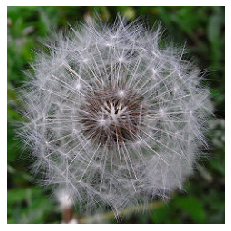

In [16]:
prediction1 = import_and_predict(image1_dir, label)

In [17]:
prediction1

'dandelion'

In [21]:
divergence_fn = lambda q,p,_:tfd.kl_divergence(q,p)/3457

model_bayes = Sequential([
    
    tfpl.Convolution2DReparameterization(input_shape=(75,75,3), filters=8, kernel_size=16, activation='relu',
                                           kernel_prior_fn = tfpl.default_multivariate_normal_fn,
                                           kernel_posterior_fn=tfpl.default_mean_field_normal_fn(is_singular=False),
                                           kernel_divergence_fn = divergence_fn,
                                           bias_prior_fn = tfpl.default_multivariate_normal_fn,
                                           bias_posterior_fn=tfpl.default_mean_field_normal_fn(is_singular=False),
                                           bias_divergence_fn = divergence_fn),
    MaxPooling2D(2,2),
    Conv2D(32, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.2),
    tfpl.DenseReparameterization(units=tfpl.OneHotCategorical.params_size(5), activation=None,
                                    kernel_prior_fn = tfpl.default_multivariate_normal_fn,
                                    kernel_posterior_fn=tfpl.default_mean_field_normal_fn(is_singular=False),
                                    kernel_divergence_fn = divergence_fn,
                                    bias_prior_fn = tfpl.default_multivariate_normal_fn,
                                    bias_posterior_fn=tfpl.default_mean_field_normal_fn(is_singular=False),
                                    bias_divergence_fn = divergence_fn
                                ),
    tfpl.OneHotCategorical(5)
    
])
model_bayes.summary()

Instructions for updating:
Please use `layer.add_weight` method instead.
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_reparameterization (C (None, 60, 60, 8)         12304     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 30, 30, 8)         0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 28, 28, 32)        2336      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 12, 12, 64)        18496     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 6, 6, 64)          0         
_______________________________________________

In [22]:
def negative_log_likelihood(y_true, y_pred):
    return -y_pred.log_prob(y_true)

model_bayes.compile(loss = negative_log_likelihood,
              optimizer = Adam(learning_rate=0.005),
              metrics = ['accuracy'],
              experimental_run_tf_function = False)

In [23]:
history_bayes = model_bayes.fit(
      train_generator,
      epochs=300,
      verbose=1)

Epoch 1/200
17/17 [==============================] - 17s 1s/step - loss: 8.0474 - accuracy: 0.2042
Epoch 2/200
17/17 [==============================] - 18s 1s/step - loss: 7.7777 - accuracy: 0.2123
Epoch 3/200
17/17 [==============================] - 19s 1s/step - loss: 7.6277 - accuracy: 0.2028
Epoch 4/200
17/17 [==============================] - 19s 1s/step - loss: 7.4654 - accuracy: 0.2068
Epoch 5/200
17/17 [==============================] - 20s 1s/step - loss: 7.2868 - accuracy: 0.2175
Epoch 6/200
17/17 [==============================] - 21s 1s/step - loss: 7.1373 - accuracy: 0.2106
Epoch 7/200
17/17 [==============================] - 22s 1s/step - loss: 6.9747 - accuracy: 0.2083
Epoch 8/200
17/17 [==============================] - 24s 1s/step - loss: 6.8116 - accuracy: 0.2181
Epoch 9/200
17/17 [==============================] - 24s 1s/step - loss: 6.6349 - accuracy: 0.2080
Epoch 10/200
17/17 [==============================] - 23s 1s/step - loss: 6.4737 - accuracy: 0.1990
Epoch 11/

17/17 [==============================] - 25s 1s/step - loss: 1.6255 - accuracy: 0.5470
Epoch 84/200
17/17 [==============================] - 24s 1s/step - loss: 1.6166 - accuracy: 0.5531
Epoch 85/200
17/17 [==============================] - 23s 1s/step - loss: 1.6412 - accuracy: 0.5383
Epoch 86/200
17/17 [==============================] - 24s 1s/step - loss: 1.5832 - accuracy: 0.5499
Epoch 87/200
17/17 [==============================] - 24s 1s/step - loss: 1.5792 - accuracy: 0.5675
Epoch 88/200
17/17 [==============================] - 26s 2s/step - loss: 1.5881 - accuracy: 0.5545
Epoch 89/200
17/17 [==============================] - 25s 1s/step - loss: 1.5885 - accuracy: 0.5476
Epoch 90/200
17/17 [==============================] - 23s 1s/step - loss: 1.5191 - accuracy: 0.5765
Epoch 91/200
17/17 [==============================] - 24s 1s/step - loss: 1.5254 - accuracy: 0.5739
Epoch 92/200
17/17 [==============================] - 23s 1s/step - loss: 1.5108 - accuracy: 0.5678
Epoch 93/200


17/17 [==============================] - 21s 1s/step - loss: 1.1229 - accuracy: 0.6980
Epoch 165/200
17/17 [==============================] - 22s 1s/step - loss: 1.1362 - accuracy: 0.6942
Epoch 166/200
17/17 [==============================] - 21s 1s/step - loss: 1.1790 - accuracy: 0.6850
Epoch 167/200
17/17 [==============================] - 21s 1s/step - loss: 1.1416 - accuracy: 0.7090
Epoch 168/200
17/17 [==============================] - 21s 1s/step - loss: 1.1497 - accuracy: 0.6723
Epoch 169/200
17/17 [==============================] - 21s 1s/step - loss: 1.0831 - accuracy: 0.7171
Epoch 170/200
17/17 [==============================] - 21s 1s/step - loss: 1.1219 - accuracy: 0.7104
Epoch 171/200
17/17 [==============================] - 21s 1s/step - loss: 1.1074 - accuracy: 0.7087
Epoch 172/200
17/17 [==============================] - 22s 1s/step - loss: 1.0931 - accuracy: 0.7159
Epoch 173/200
17/17 [==============================] - 21s 1s/step - loss: 1.0874 - accuracy: 0.7223
Epoc

In [24]:
def import_and_predict_bayes(image, true_label):

    #read image
    img = cv2.imread(image)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) 
    
    #show the image
    plt.imshow(img)
    plt.axis('off')
    
    img_resize = (cv2.resize(img, dsize=(75, 75), interpolation=cv2.INTER_CUBIC))/255.
    
    predicted_probabilities = np.empty(shape=(300, 5))
    
    for i in range(300):
        
        predicted_probabilities[i] = model_bayes(img_resize[np.newaxis,...]).mean().numpy()[0]
        
    pct_2p5 = np.array([np.percentile(predicted_probabilities[:, i], 2.5) for i in range(5)])
    pct_97p5 = np.array([np.percentile(predicted_probabilities[:, i], 97.5) for i in range(5)])
    
    fig, ax = plt.subplots(figsize=(12, 6))
    bar = ax.bar(np.arange(5), pct_97p5, color='red')
    bar[true_label].set_color('green')
    bar = ax.bar(np.arange(5), pct_2p5-0.02, color='white', linewidth=1, edgecolor='white')
    ax.set_xticklabels([''] + [x for x in label])
    ax.set_ylim([0, 1])
    ax.set_ylabel('Probability')
    plt.show()

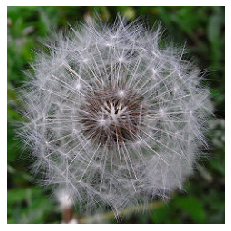

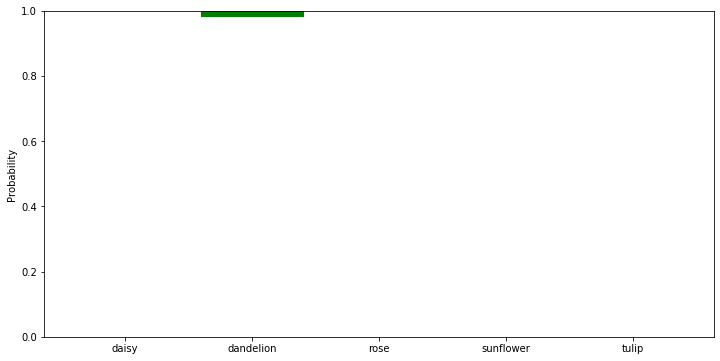

In [25]:
import_and_predict_bayes(image1_dir, label.index('dandelion'))